MDE Techniken
Omnilab ist MDe

Code generation 
MDE ander beschrieben asl MBSE
MDE eher inklusiv

digital thread
digital companion

Threads to validity -- Model driven begriff-> what did we do?
geometric kinematics

logical vs physical why
AutomationML

# packages

In [242]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [243]:
destination_folder = 'target/img/final/'

# imports

In [244]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt

# Read data variable from csv

In [245]:
df = pd.read_csv(filepath_or_buffer="data/extraction consolidation results.csv", sep="|", encoding="latin-1")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
del metadata
del df
del titles

data.head()

# Data analysis

## What

occurrences_df = data["model processing technique"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per model processing technique')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.tight_layout()

plt.show()

data["modeling language"].value_counts()

   entry  count
0   2022     25
1   2021     18
2   2020     18
3   2023      6


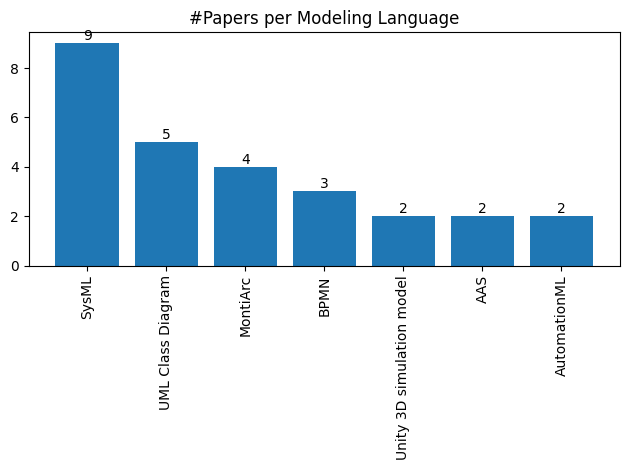

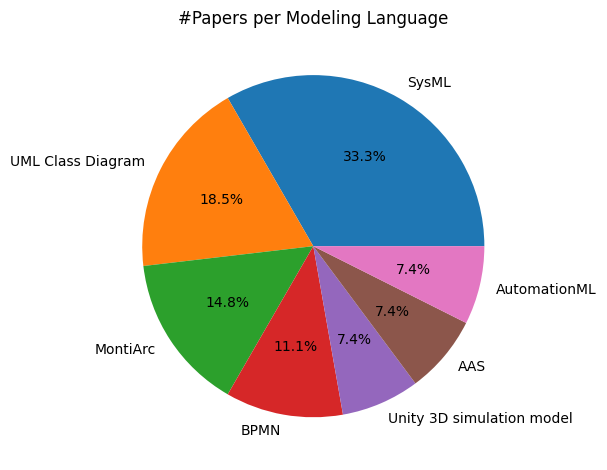

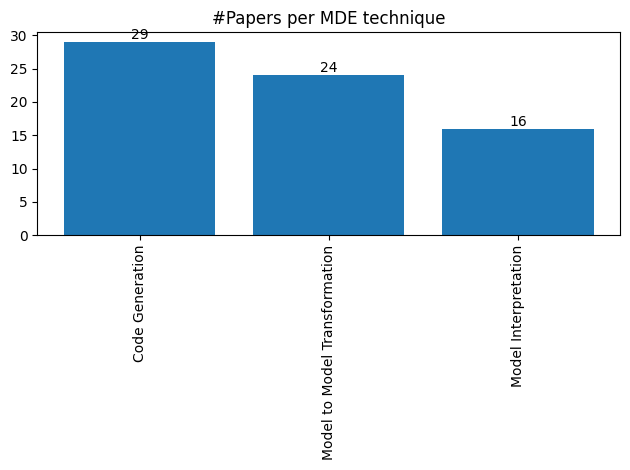

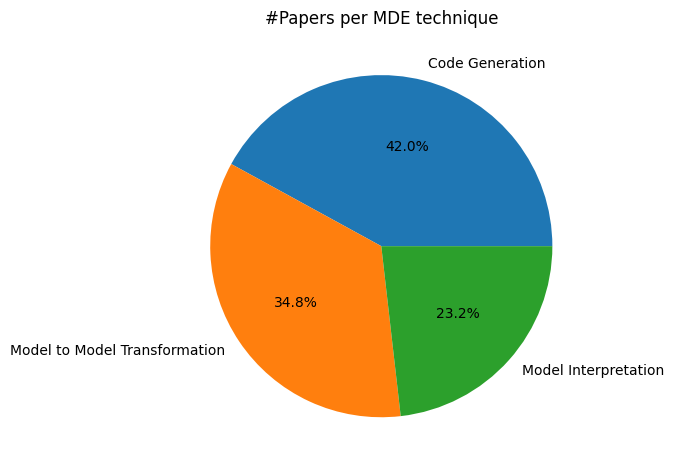

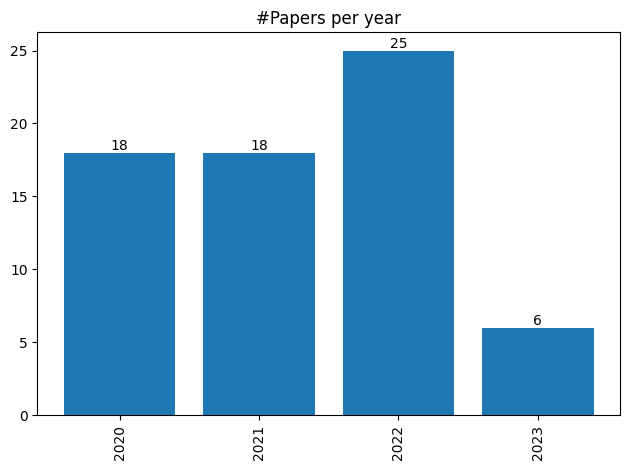

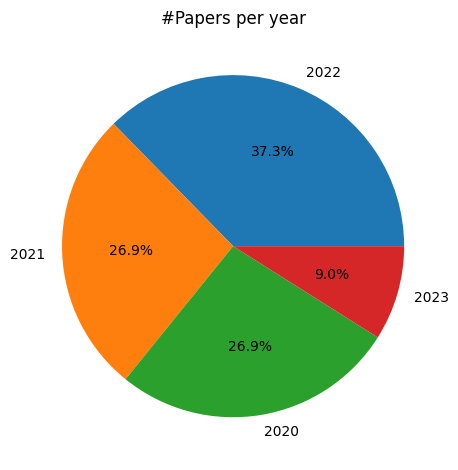

In [246]:
modeling_language = data["modeling language"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']
years = data["Publication Year"].value_counts().reset_index()
years.columns = ['entry', 'count']
years['entry'] = years['entry'].astype(int)
print(years)
fig, axes = plt.subplots()

# List of DataFrames
dataframes = [modeling_language, mde_technique, years]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique', '#Papers per year']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[0])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.tight_layout()
plt.savefig(destination_folder+"3 Papers per Modeling Language.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[0])
plt.tight_layout()
plt.savefig(destination_folder+"3 Papers per Modeling Language Percent.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
#plt.show()
plt.tight_layout()
plt.savefig(destination_folder+"3 Papers per MDE technique.jpg")


fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[1])
plt.tight_layout()
plt.savefig(destination_folder+"3 Papers per MDE Percent.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[2])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.tight_layout()
plt.savefig(destination_folder+"3 Papers per Year.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[2])
plt.tight_layout()
plt.savefig(destination_folder+"3 Papers per Year.jpg")



In [247]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\4011169992.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


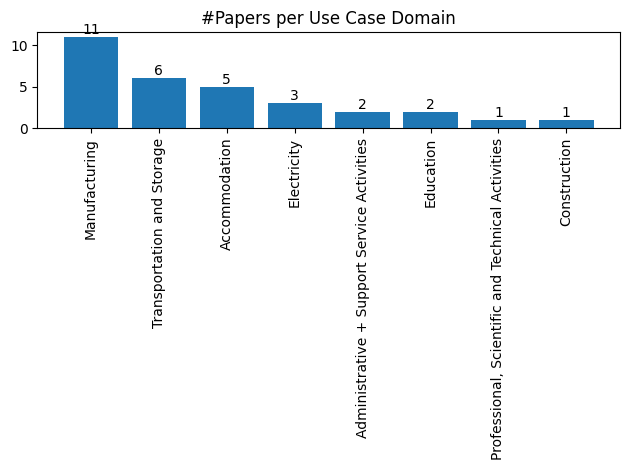

In [248]:
fig, axes = plt.subplots()
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[0])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"3 Paper per use case domain.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\3152623064.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


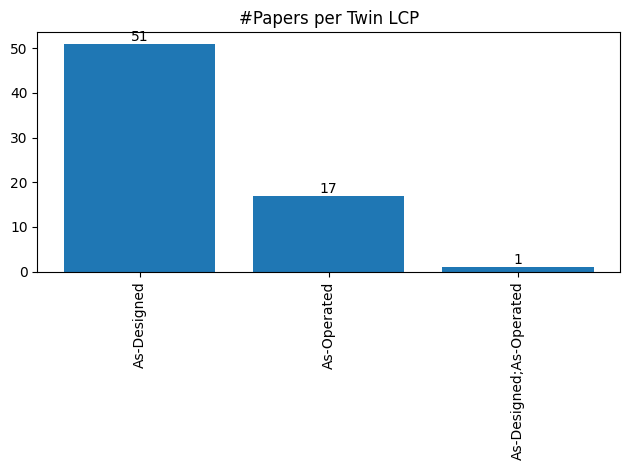

In [249]:
fig, axes = plt.subplots()
plot_data = dataframes[3]#.groupby(['entry']).filter(lambda x: len(x)>1)

axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[3])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"3 Paper per TLCP.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\1781711938.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


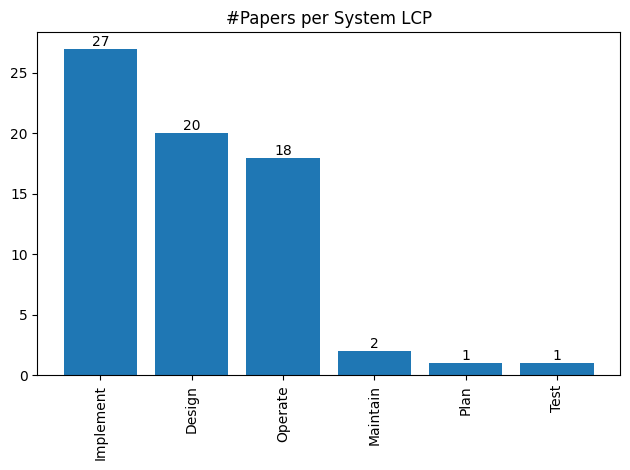

In [250]:
fig, axes = plt.subplots()
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"3 Paper per SLCP.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\3305188227.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\3305188227.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\3305188227.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\3305188227.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_36692\3305188227.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels

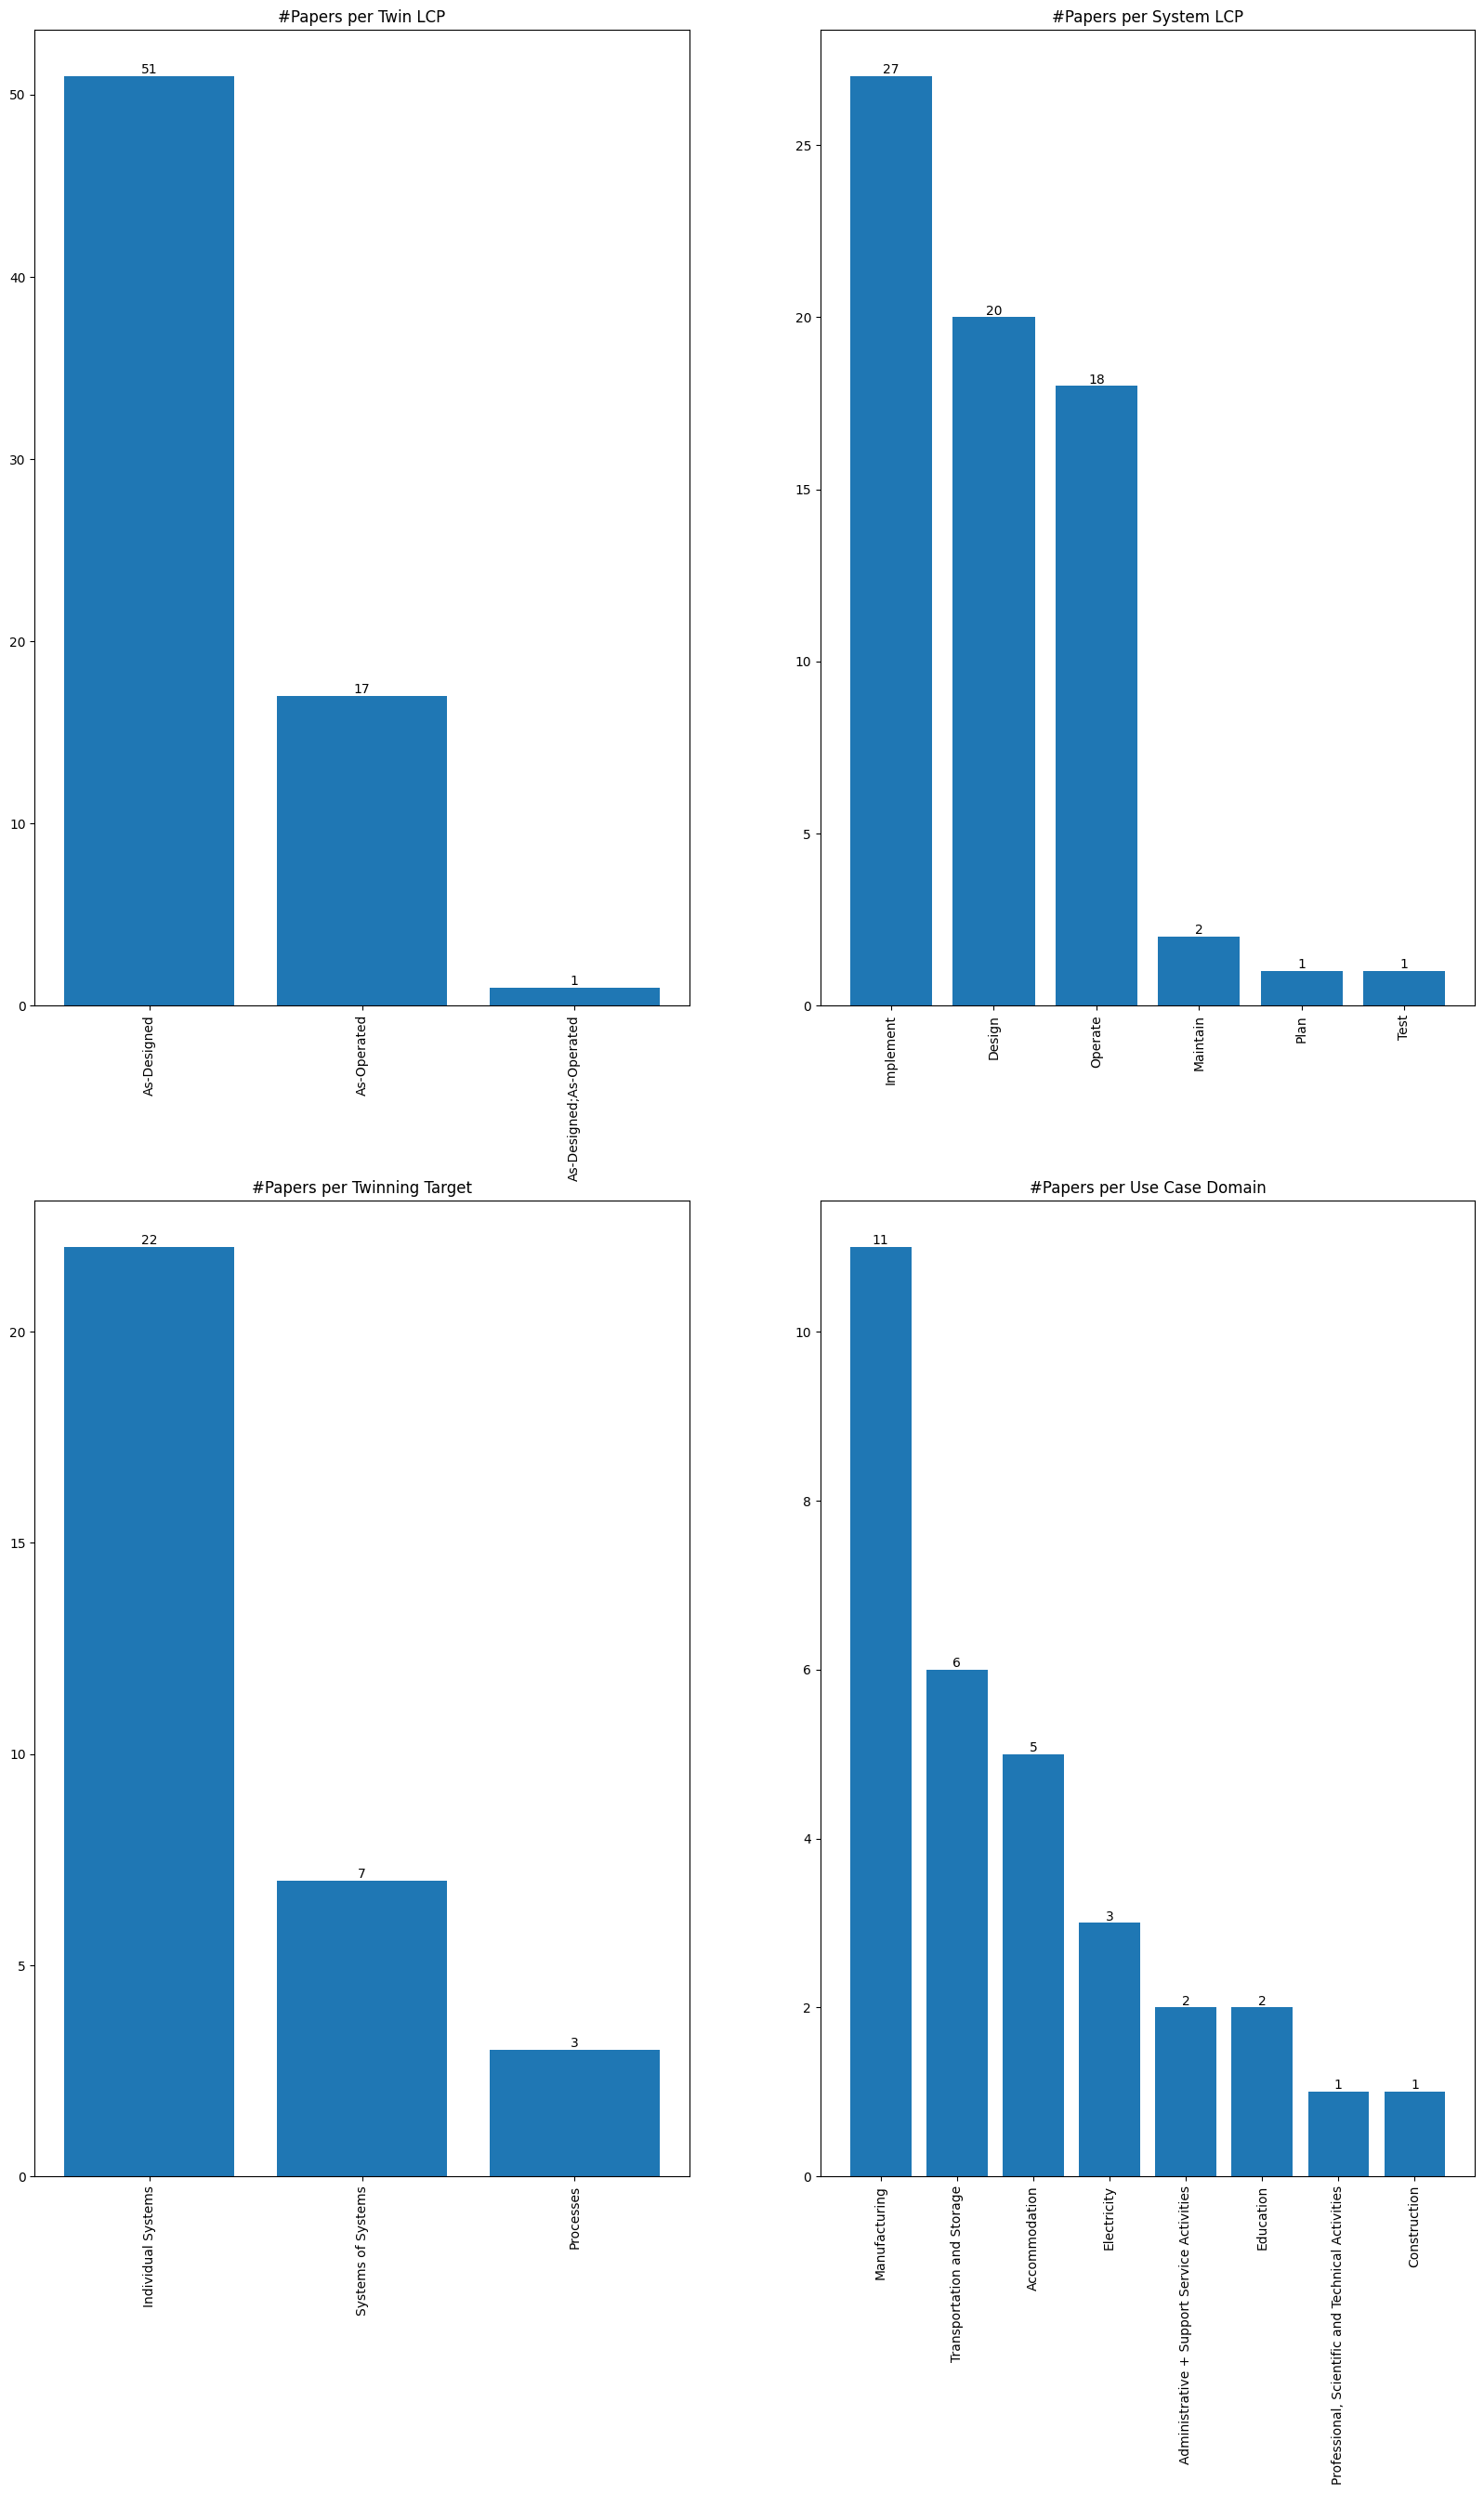

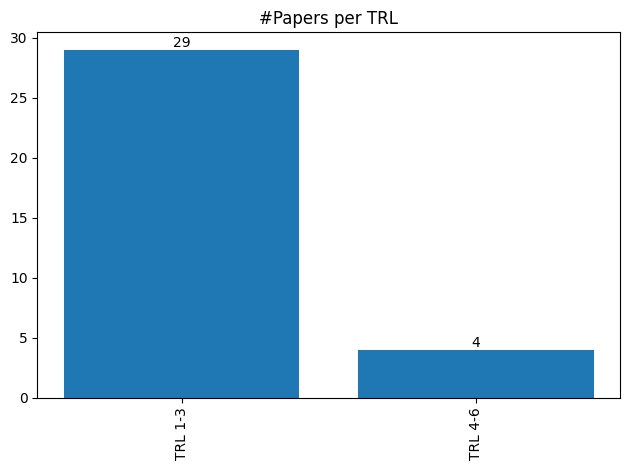

In [251]:



# Loop through the subplots and plot each bar chart
#for i, ax in enumerate(axes.flatten()):
    #if i < len(dataframes):
        #plot_data = dataframes[i]
        #ax.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
        #ax.set_title(titles[i])
        #ax.set_xticklabels(plot_data['entry'], rotation=90)
        #ax.bar_label(ax.containers[0])


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))
plot_data = dataframes[0]
axes[1][1].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[1][1].set_title(titles[0])
axes[1][1].set_xticklabels(plot_data['entry'], rotation=90)
axes[1][1].bar_label(axes[1][1].containers[0])

#
#plt.savefig("3 Paper per use case.jpg")
#fig, axes = plt.subplots()
plot_data = dataframes[1]
axes[0][1].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[0][1].set_title(titles[1])
axes[0][1].set_xticklabels(plot_data['entry'], rotation=90)
axes[0][1].bar_label(axes[0][1].containers[0])


#plt.savefig(destination_folder+"3 Paper per System LCP.jpg")
#fig, axes = plt.subplots()
plot_data = dataframes[2]
axes[1][0].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[1][0].set_title(titles[2])
axes[1][0].set_xticklabels(plot_data['entry'], rotation=90)
axes[1][0].bar_label(axes[1][0].containers[0])


#plt.savefig(destination_folder+"3 Paper per TT.jpg")
#fig, axes = plt.subplots()
plot_data = dataframes[3]
axes[0][0].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[0][0].set_title(titles[3])
axes[0][0].set_xticklabels(plot_data['entry'], rotation=90)
axes[0][0].bar_label(axes[0][0].containers[0])
plt.savefig(destination_folder+"3 Overview.jpg")

#plt.savefig(destination_folder+"3 Paper per Twin LCP.jpg")

fig, axes = plt.subplots()
plot_data = dataframes[4]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[4])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles
plt.tight_layout()
plt.savefig(destination_folder+"3 Paper per TRL.jpg")


# 3.2 MDE

occurrences_df = data["modeling language"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
occurrences_df = occurrences_df[occurrences_df['count'] > 1]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per modeling language')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

value               technique                    
Individual Systems  Code Generation                  23
                    Model Interpretation              9
                    Model to Model Transformation    14
Processes           Model Interpretation              2
                    Model to Model Transformation     3
Systems of Systems  Code Generation                   4
                    Model to Model Transformation     5
dtype: int64


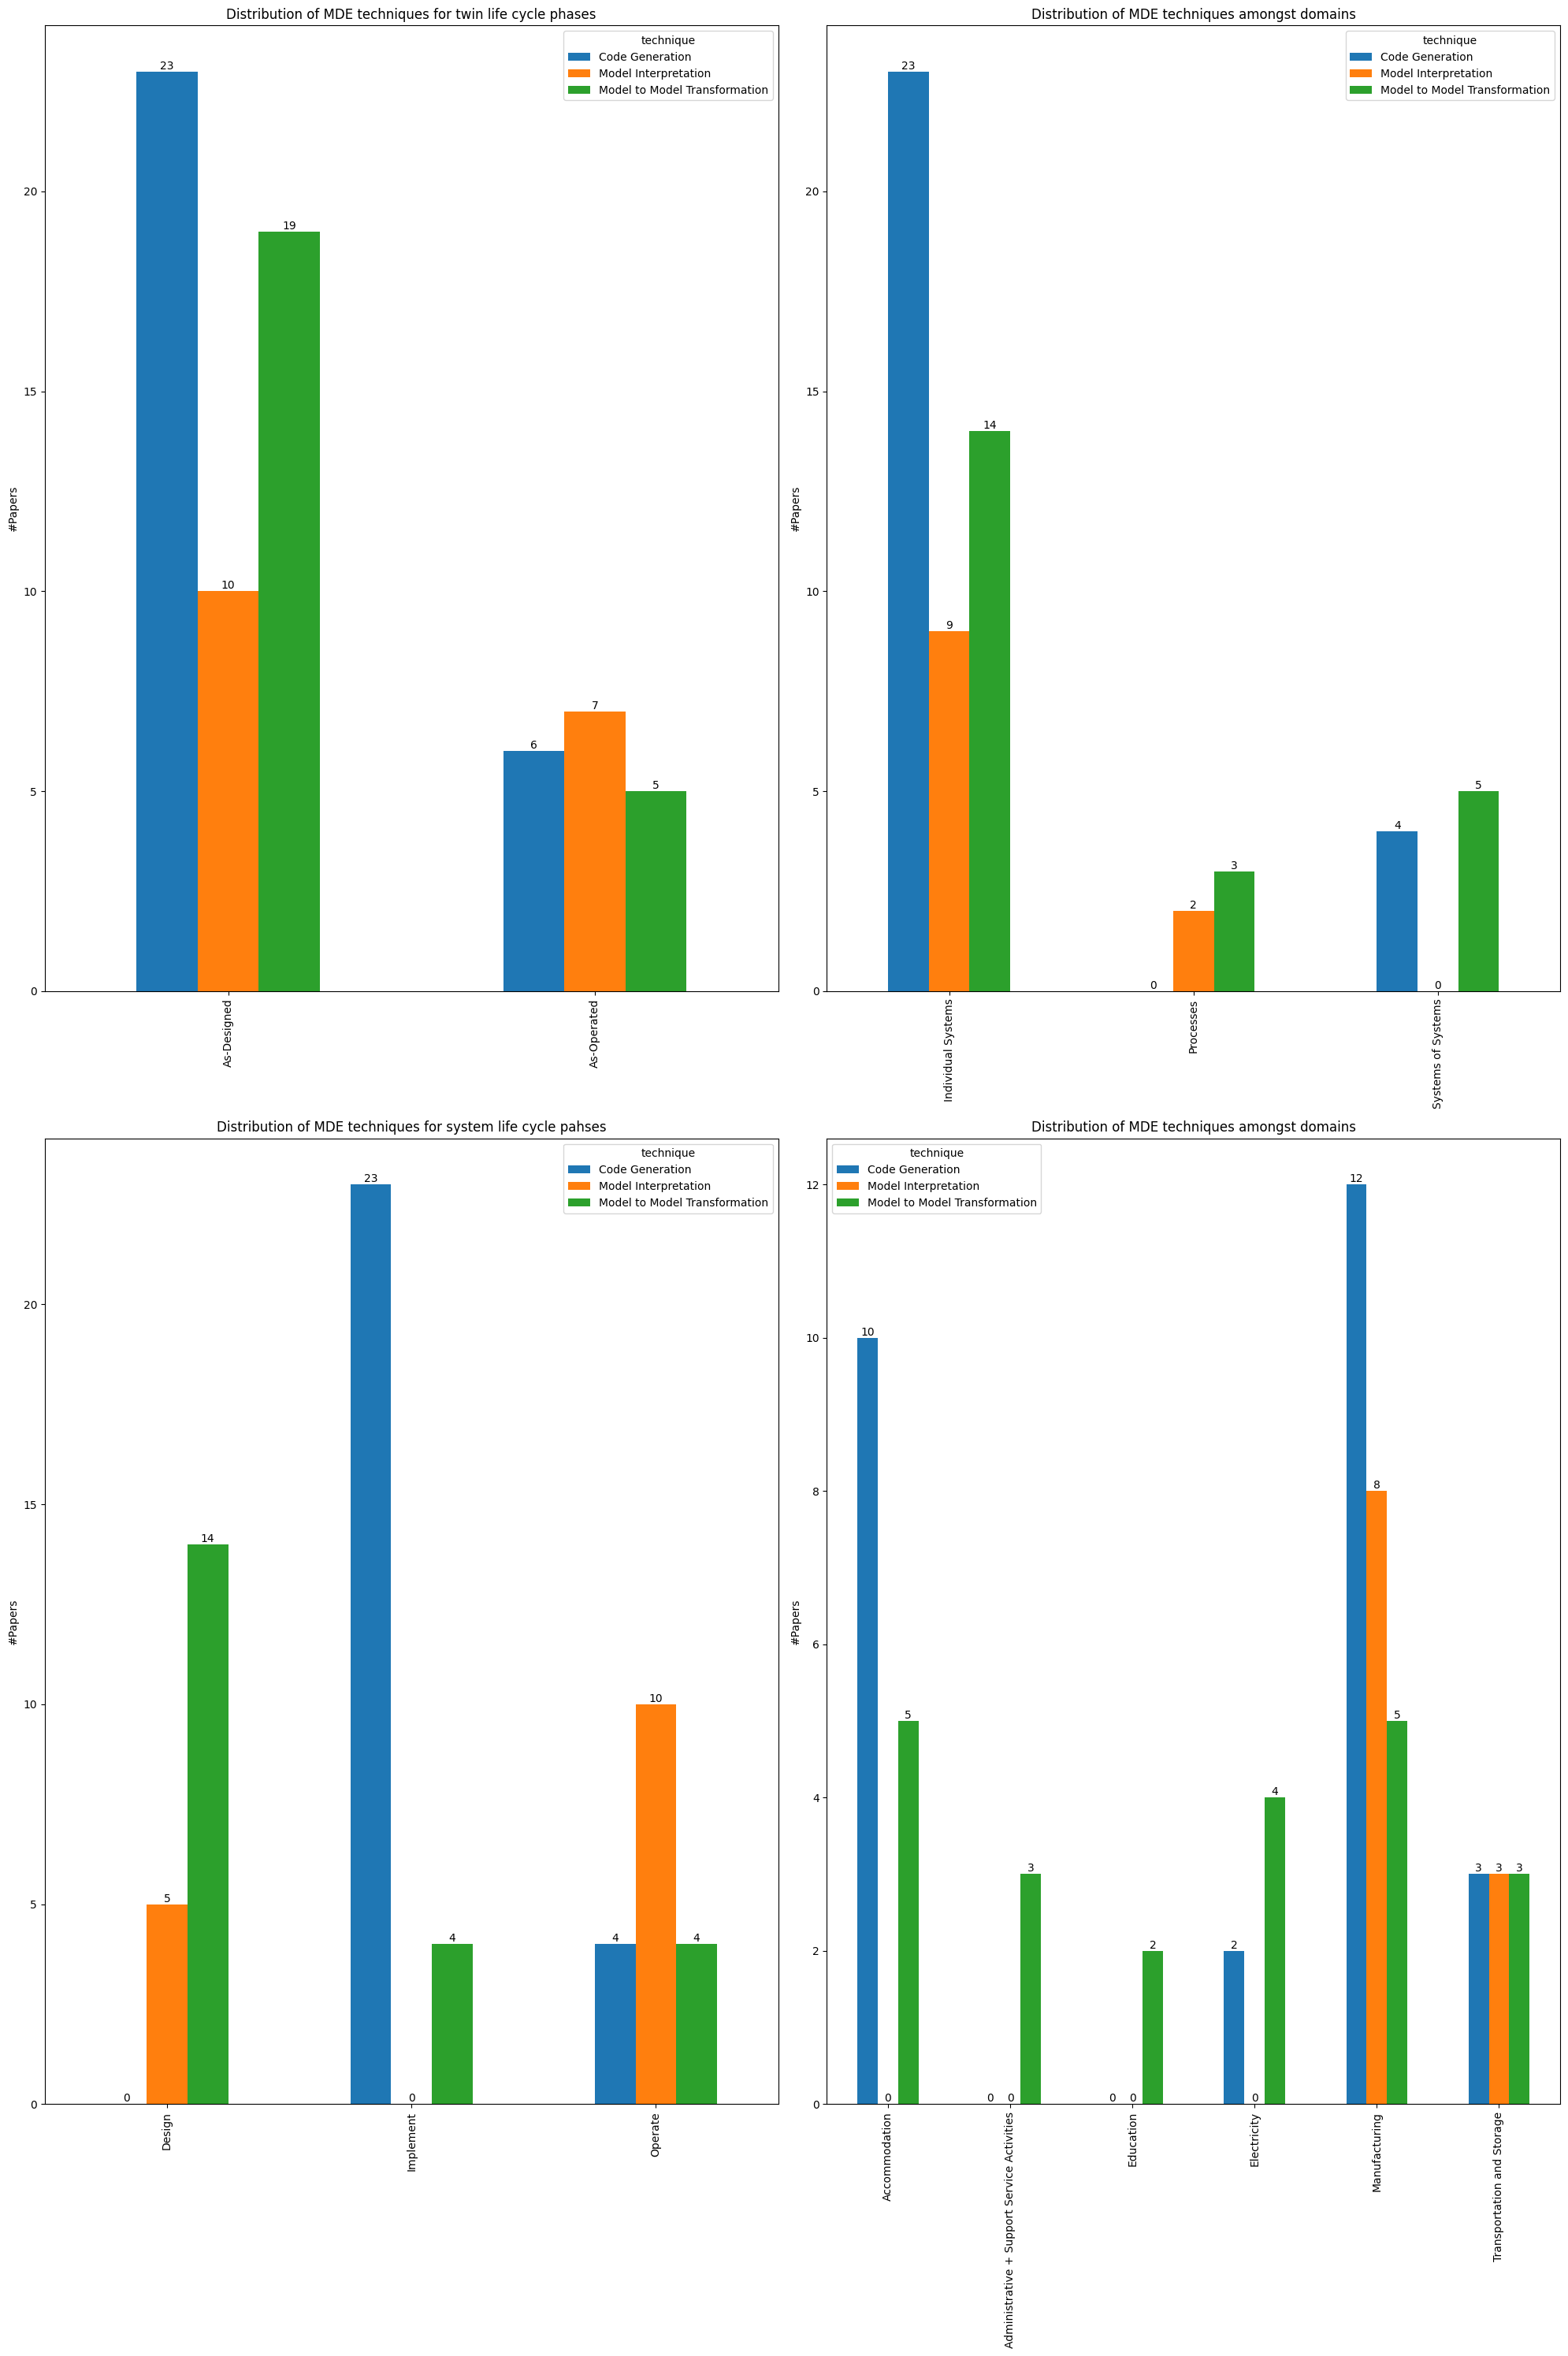

In [252]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = mdeContents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": twinning_target, "technique": mdeContents["model processing technique"]}])
        twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))

domains_techniques = domains_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)#.replace(0, np.nan, inplace = True)
domains_techniques.replace(0, np.nan, inplace = True)
ax = domains_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][1], 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(destination_folder+"2.2 MDE Dom.jpg")
#fig, axes = plt.subplots()

twinning_target_techniques = twinning_target_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)#.replace(0, np.nan, inplace = True)
twinning_target_techniques.replace(0, np.nan, inplace = True)
print(twinning_target_techniques.groupby(['value','technique']).size())
ax = twinning_target_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][1],
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques amongst domain')
#plt.savefig(destination_folder+"2.2 MDE TT.jpg")
#############################

#fig, axes = plt.subplots()
system_lcp_techniques = system_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)#.replace(0, np.nan, inplace = True)
system_lcp_techniques.replace(0, np.nan, inplace = True)
ax = system_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][0],
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for system life cycle pahses", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques for system life cycle pahses')
#plt.savefig(destination_folder+"2.2 MDE SLCP.jpg")

#fig, axes = plt.subplots()
twin_lcp_techniques = twin_lcp_techniques#.groupby(['value','technique']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in twin_lcp_techniques['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = twin_lcp_techniques.loc[index]['value'].split(";")
            trl = twin_lcp_techniques.loc[index]['technique']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "technique": trl}])
                twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)
    index += 1
twin_lcp_techniques.replace(0, np.nan, inplace = True)
twin_lcp_techniques = twin_lcp_techniques.drop(indexlist)#.replace(0, np.nan, inplace = True)
ax = twin_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][0],
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for twin life cycle phases", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.2 MDE per Overview.jpg")


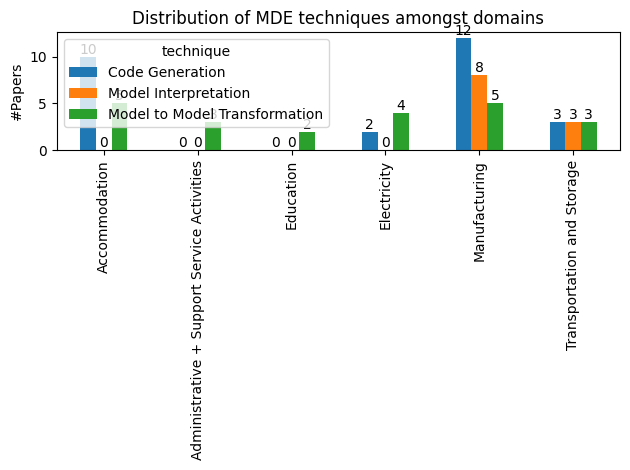

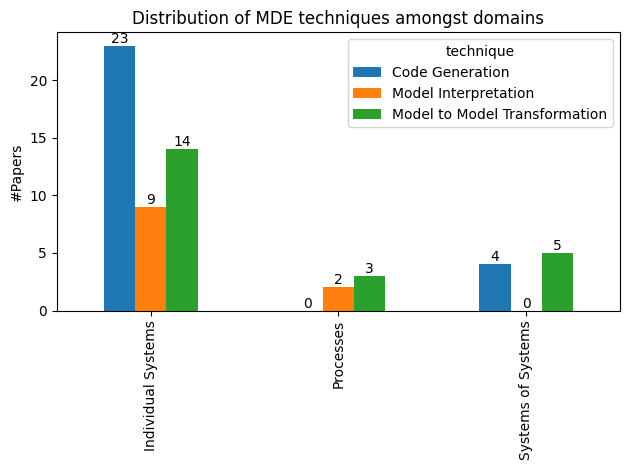

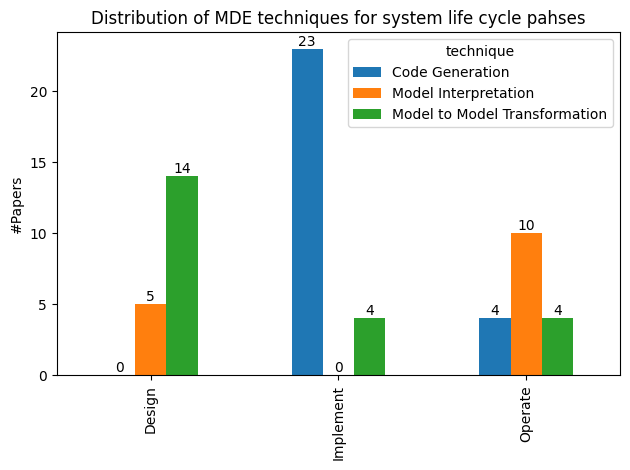

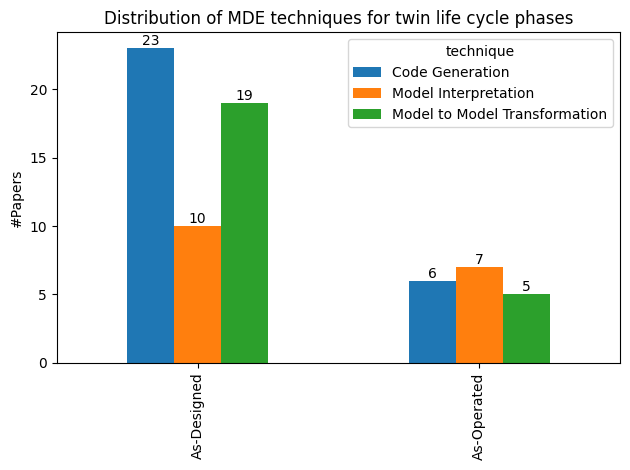

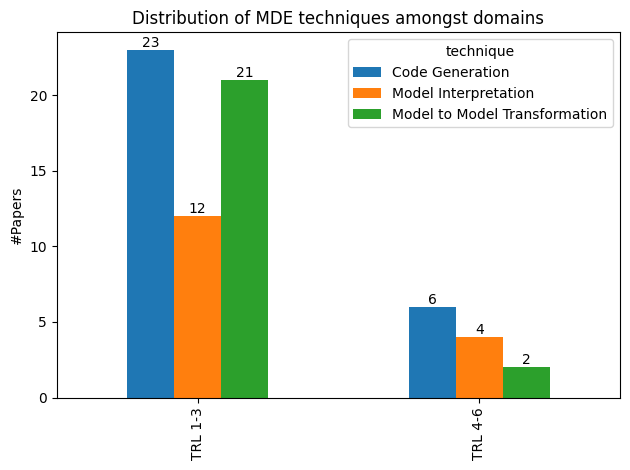

In [253]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = mdeContents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": twinning_target, "technique": mdeContents["model processing technique"]}])
        twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)

fig, axes = plt.subplots()

domains_techniques = domains_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = domains_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.2 MDE Dom.jpg")
#############################

fig, axes = plt.subplots()

twinning_target_techniques = twinning_target_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = twinning_target_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.2 MDE TT.jpg")

#############################

fig, axes = plt.subplots()
system_lcp_techniques = system_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = system_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for system life cycle pahses", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.2 MDE SLCP.jpg")

#############################

fig, axes = plt.subplots()
twin_lcp_techniques = twin_lcp_techniques#.groupby(['value','technique']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in twin_lcp_techniques['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = twin_lcp_techniques.loc[index]['value'].split(";")
            trl = twin_lcp_techniques.loc[index]['technique']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "technique": trl}])
                twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)
    index += 1
twin_lcp_techniques = twin_lcp_techniques.drop(indexlist)

ax = twin_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for twin life cycle phases", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.2 MDE tlcp.jpg")

#############################

fig, axes = plt.subplots()
trl_techniques = trl_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = trl_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                         ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.2 MDE TRL.jpg")

# 3.1.3 Over the years

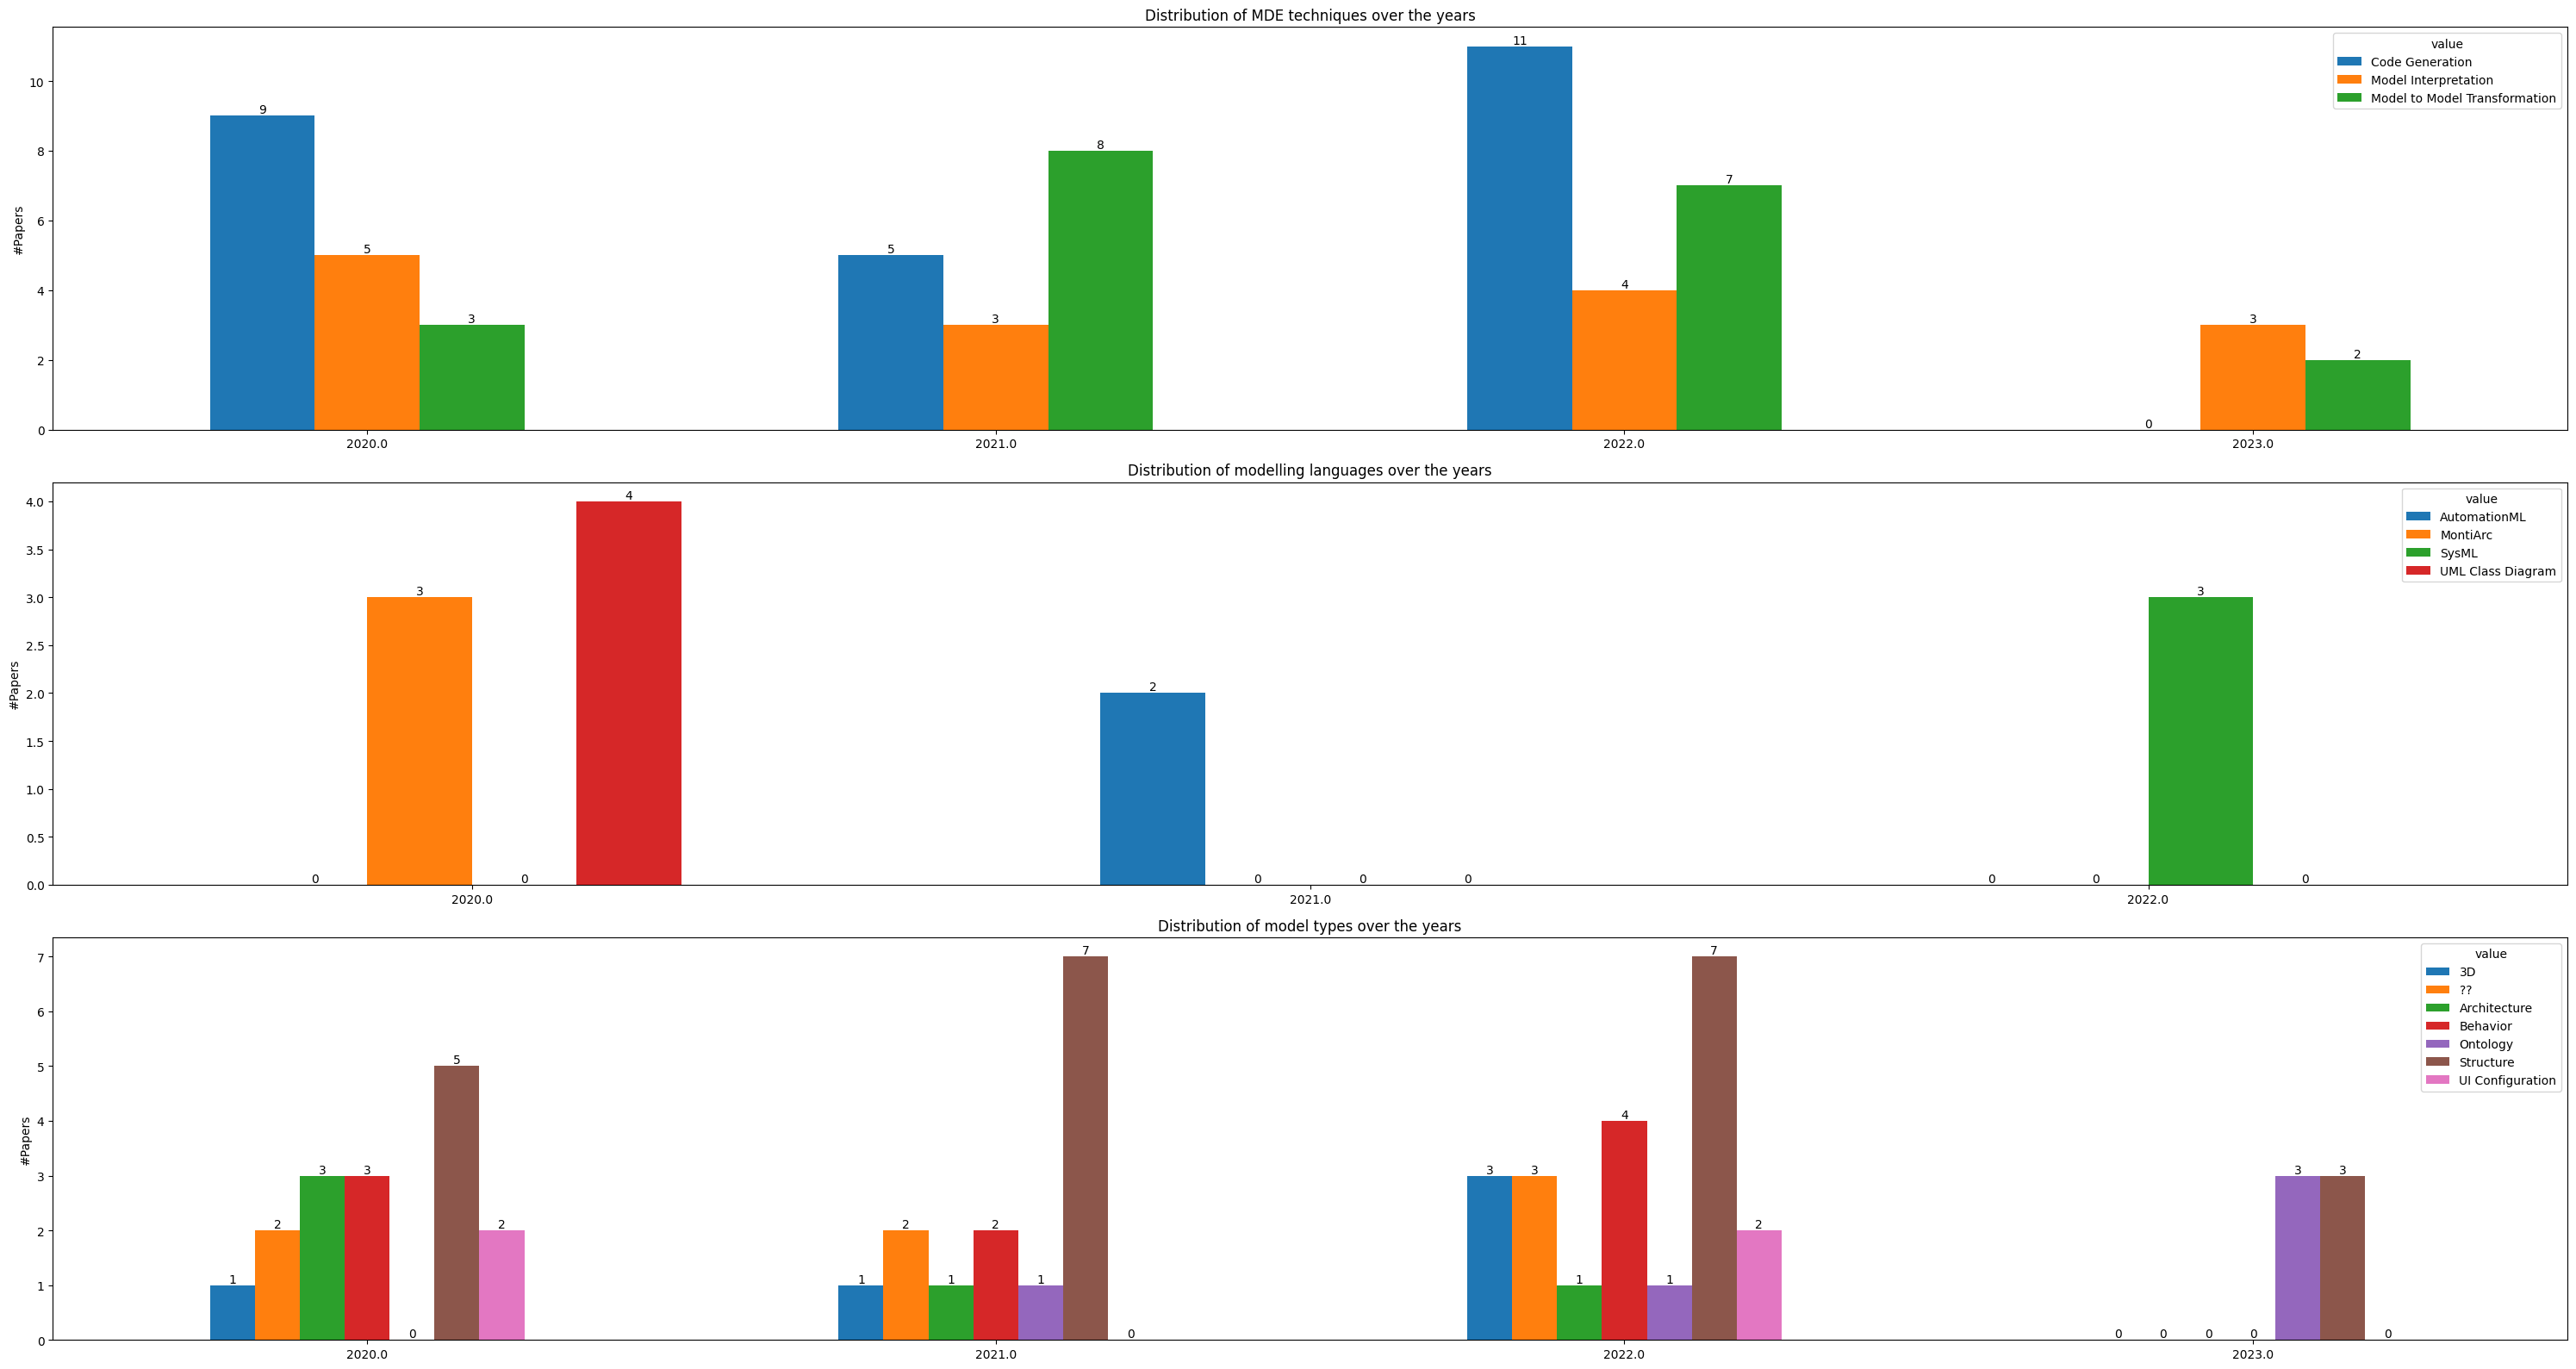

In [254]:
model_processing_techniques = pd.DataFrame(columns = ['value', 'Publication Year'])
year_model_type = pd.DataFrame(columns = ['value', 'Publication Year'])
model_language = pd.DataFrame(columns = ['value', 'Publication Year'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:
        year = contents['Publication Year']

        for item in lang:
            new_line = pd.DataFrame([{"value": item, 'Publication Year': year}])
            model_language = pd.concat([model_language, new_line], ignore_index=True)

        for index, mdeContents in contents["modelTrafos"].items():
            mdeContents = json.loads(mdeContents)
            new_line = pd.DataFrame([{"value": mdeContents['model processing technique'], 'Publication Year': year}])
            model_processing_techniques = pd.concat([model_processing_techniques, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['model type'], 'Publication Year': year}])
            year_model_type = pd.concat([year_model_type, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 16))


model_processing_techniques = model_processing_techniques#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = model_processing_techniques.groupby(['Publication Year','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0], 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="", rot=0)

label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of MDE techniques over the years')

model_language = model_language.groupby(['value','Publication Year'])
model_language = model_language.filter(lambda x : len(x) > 1).groupby(['Publication Year','value'])
ax = model_language.size().unstack().plot(kind='bar', stacked=False, ax=axes[1],
                                                                         ylabel="#Papers", title="Distribution of modelling languages over the years", xlabel="", rot=0)

for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of modelling languages over the years')

year_model_type = year_model_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = year_model_type.groupby(['Publication Year','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes[2],
                                                                                     ylabel="#Papers", title="Distribution of model types over the years", xlabel="", rot=0)
for container in ax.containers:
    ax.bar_label(container)
#plt.title('Distribution over the years')

plt.tight_layout()
plt.savefig(destination_folder+"3.1.3 Overview.jpg")
    

In [282]:
source_year = pd.DataFrame(columns = ['value', 'Publication Year'])
target_year = pd.DataFrame(columns = ['value', 'Publication Year'])
model_language = pd.DataFrame(columns = ['value', 'Publication Year'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:
        year = contents['Publication Year']

        for item in lang:
            new_line = pd.DataFrame([{"value": item, 'Publication Year': year}])
            model_language = pd.concat([model_language, new_line], ignore_index=True)

        for index, mdeContents in contents["modelTrafos"].items():
            mdeContents = json.loads(mdeContents)
            new_line = pd.DataFrame([{"value": mdeContents['model processing technique'], 'Publication Year': year}])
            source_year = pd.concat([source_year, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['model type'], 'Publication Year': year}])
            target_year = pd.concat([target_year, new_line], ignore_index=True)
    except KeyError as err:
        continue

    Publication Year                          value  count
0             2020.0                Code Generation      9
3             2021.0                Code Generation      5
6             2022.0                Code Generation     11
11            2023.0                Code Generation      0
1             2020.0           Model Interpretation      5
4             2021.0           Model Interpretation      3
7             2022.0           Model Interpretation      4
9             2023.0           Model Interpretation      3
2             2020.0  Model to Model Transformation      3
5             2021.0  Model to Model Transformation      8
8             2022.0  Model to Model Transformation      7
10            2023.0  Model to Model Transformation      2


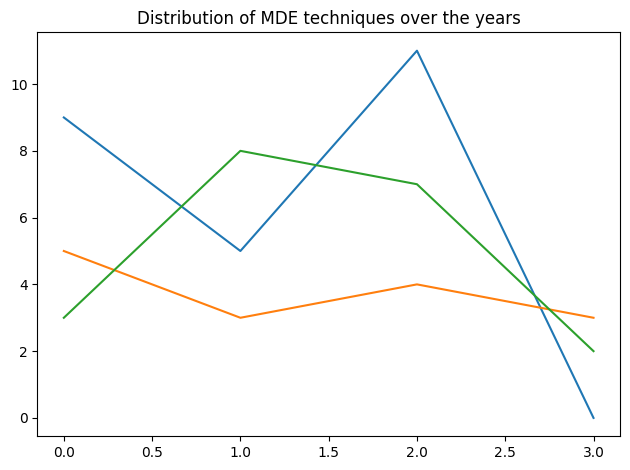

In [316]:
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots()


source_year = source_year#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
temp = source_year.groupby(['Publication Year','value']).size().reset_index()
temp.columns = ['Publication Year','value', 'count']

#################################NEVER DO THIS IN CODE for future#########################
#emergency solution to get a zero value....
new_line = pd.DataFrame([{"Publication Year": 2023.0, "value": 'Code Generation', "count": 0}])
temp = pd.concat([temp, new_line], ignore_index=True)

x = temp.sort_values(by=['value'])
titles = ['Code Generation', 'Model Interpretation', 'Model to Model Transformation']
years_vals = [2020, 2021, 2022, 2023]
cg_vales = []
mi_values = []
m2m_vales = []
for index, row in x.iterrows():
    if row['value'] == titles[0]:
        cg_vales.append(row['count'])
    if row['value'] == titles[1]:
        mi_values.append(row['count'])
    if row['value'] == titles[2]:
        m2m_vales.append(row['count'])
############################################################################################

#ax = temp.plot(x = 'Publication Year',y='count', kind='line', stacked=False, ax=axes, 
#                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="")
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(cg_vales)
plt.plot(mi_values)
plt.plot(m2m_vales)
plt.title('Distribution of MDE techniques over the years')
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.1.3 MDE over years.jpg")

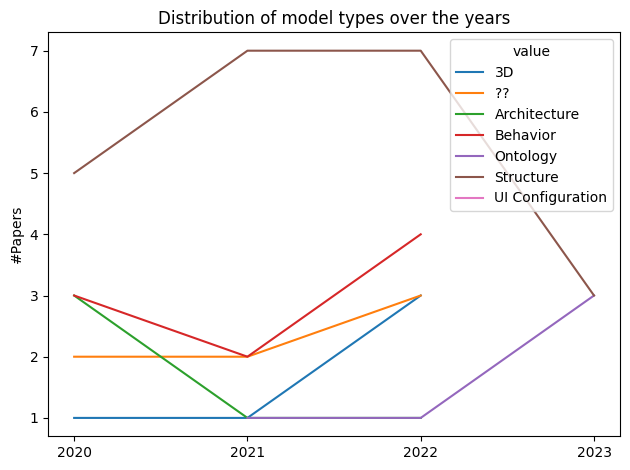

In [257]:
fig, axes = plt.subplots()
#target_year = target_year#.groupby(['value','Publication Year'])#.filter(lambda x : len(x) > 1)
ax = target_year.groupby(['Publication Year','value']).size().unstack().plot(kind='line', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of model types over the years", xlabel="")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.1.3 Model types over years.jpg")

# 3.3 Maturity

In [258]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = mdeContents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)



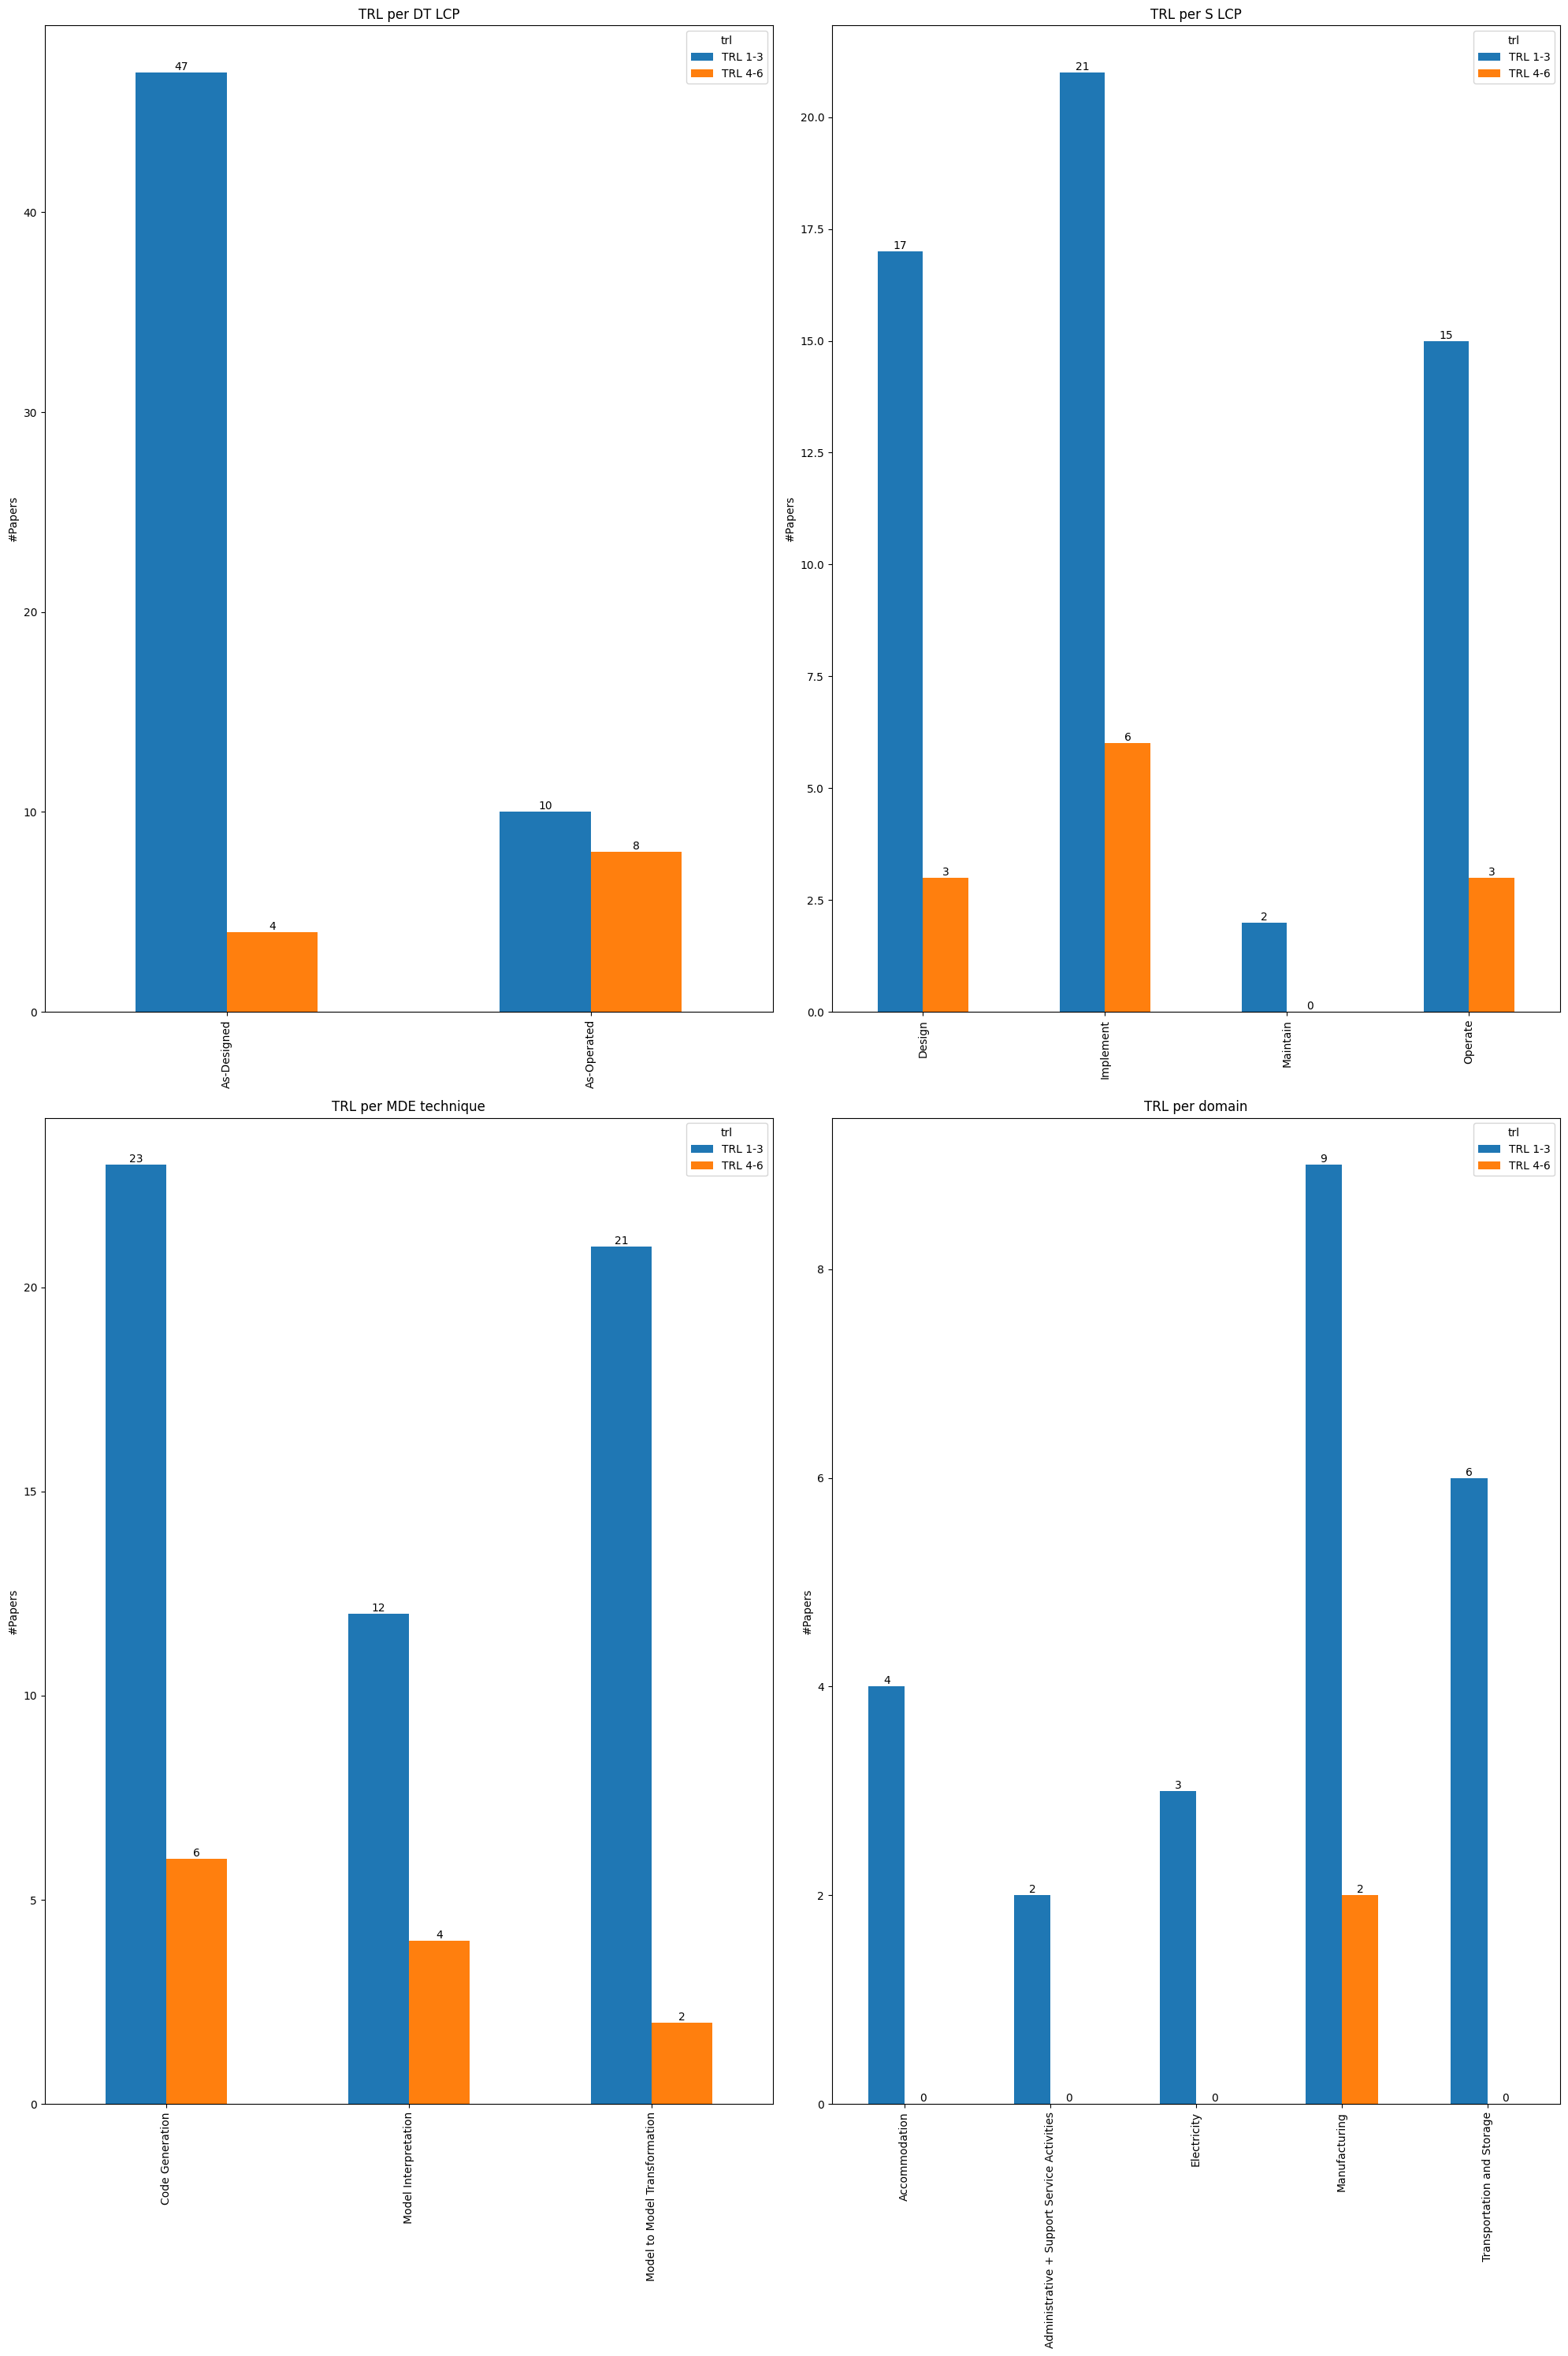

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))

domain_trl = domain_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = domain_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][1], 
                                                                             ylabel="#Papers", title="TRL per domain", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(destination_folder+"2.2 MDE Dom.jpg")
#fig, axes = plt.subplots()

#modlang_trl = modlang_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
#ax = modlang_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][1],
                                                                                     #ylabel="#Papers", title="TRL per modelling language", xlabel="")

slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = slcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][1],
                                                                         ylabel="#Papers", title="TRL per S LCP", xlabel="")

for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques amongst domain')
#plt.savefig(destination_folder+"2.2 MDE TT.jpg")
#############################

#fig, axes = plt.subplots()
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = mde_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][0],
                                                                                     ylabel="#Papers", title="TRL per MDE technique", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques for system life cycle pahses')
#plt.savefig(destination_folder+"2.2 MDE SLCP.jpg")

#fig, axes = plt.subplots()
tlcp_trl = tlcp_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in tlcp_trl['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = tlcp_trl.loc[index]['value'].split(";")
            trl = tlcp_trl.loc[index]['trl']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "trl": trl}])
                tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
    index += 1
tlcp_trl = tlcp_trl.drop(indexlist)
#print(indexlist)
#print(tlcp_trl.loc[62])
ax = tlcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][0],
                                                                                     ylabel="#Papers", title="TRL per DT LCP", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques')
plt.tight_layout()
plt.savefig(destination_folder+"3.3.1 Overview.jpg")


In [260]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = mdeContents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)

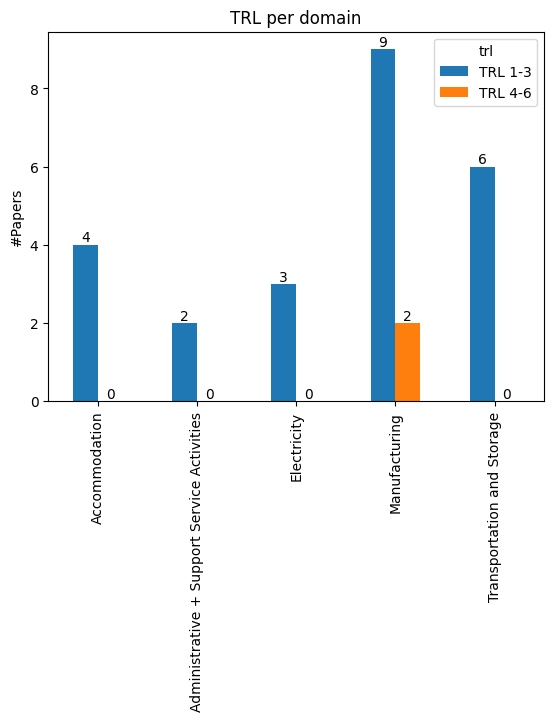

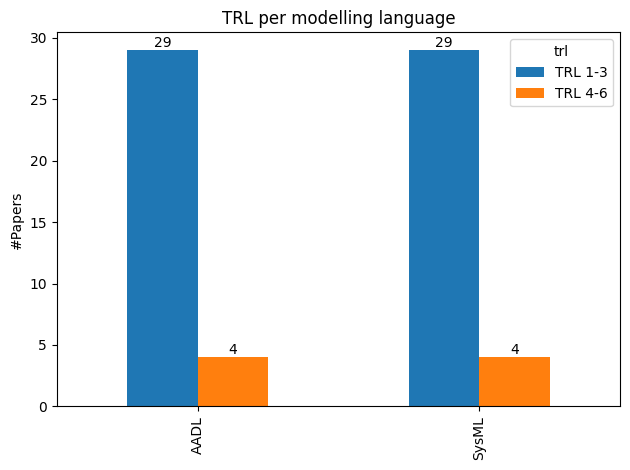

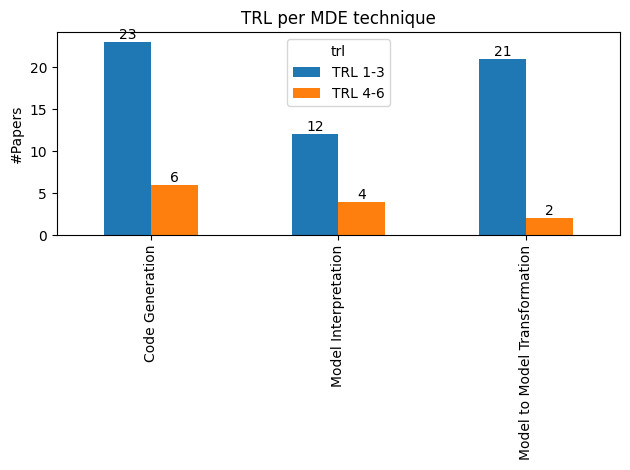

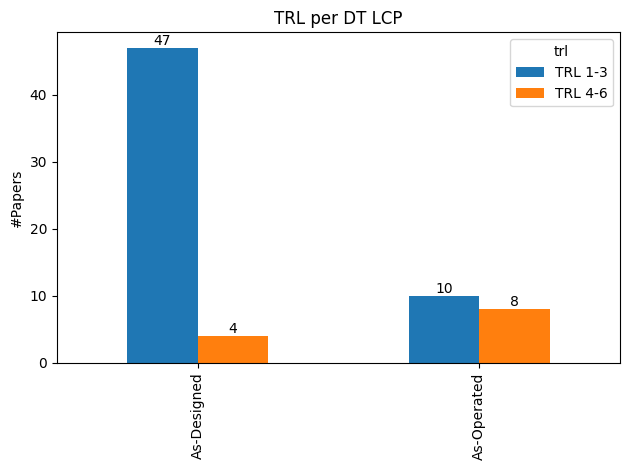

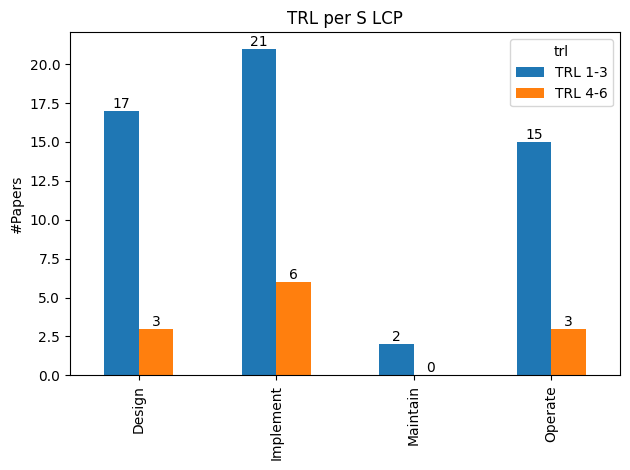

In [261]:
fig, axes = plt.subplots()

domain_trl = domain_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = domain_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="TRL per domain", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"3.3.1 Domain TRL.jpg")

#############################

fig, axes = plt.subplots()

modlang_trl = modlang_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = modlang_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per modelling language", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.3.1 Modelling Lang TRL.jpg")

#############################

fig, axes = plt.subplots()
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = mde_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per MDE technique", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.3.1 MDE TRL.jpg")

#############################

fig, axes = plt.subplots()
tlcp_trl = tlcp_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in tlcp_trl['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = tlcp_trl.loc[index]['value'].split(";")
            trl = tlcp_trl.loc[index]['trl']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "trl": trl}])
                tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
    index += 1
tlcp_trl = tlcp_trl.drop(indexlist)
ax = tlcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per DT LCP", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.3.1 tlcp TRL.jpg")

#############################

fig, axes = plt.subplots()
slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = slcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                         ylabel="#Papers", title="TRL per S LCP", xlabel="")
#plt.title('# Distribution of MDE techniques amongst domains')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"3.3.1 sclp TRL.jpg")

TODO: Design/Etc

# Testing

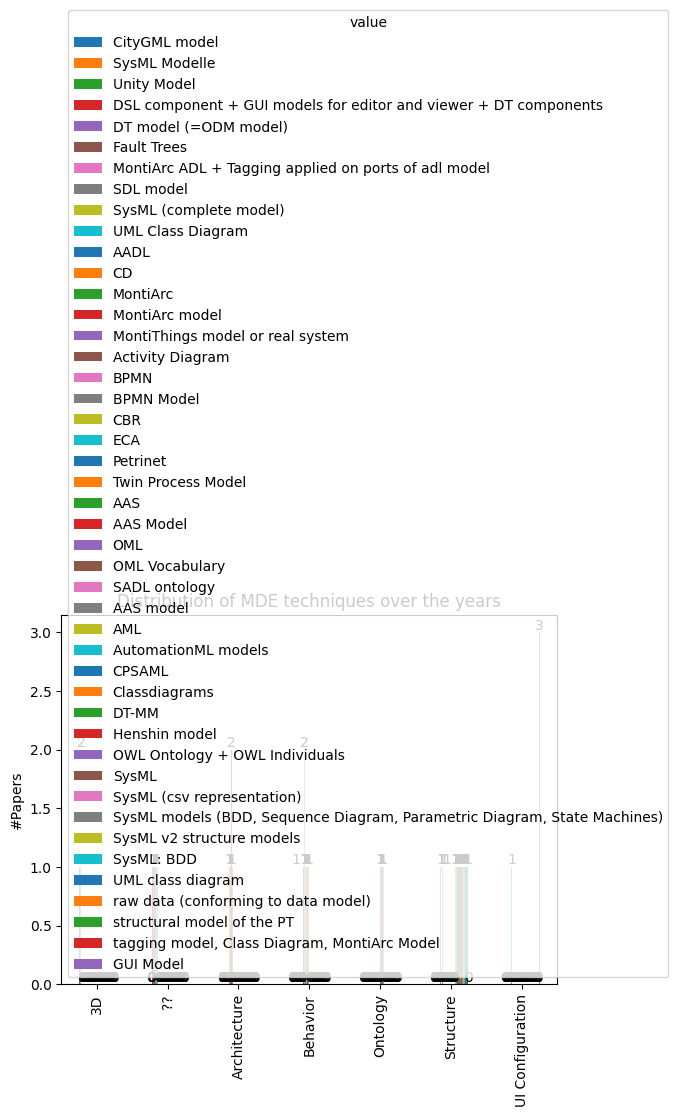

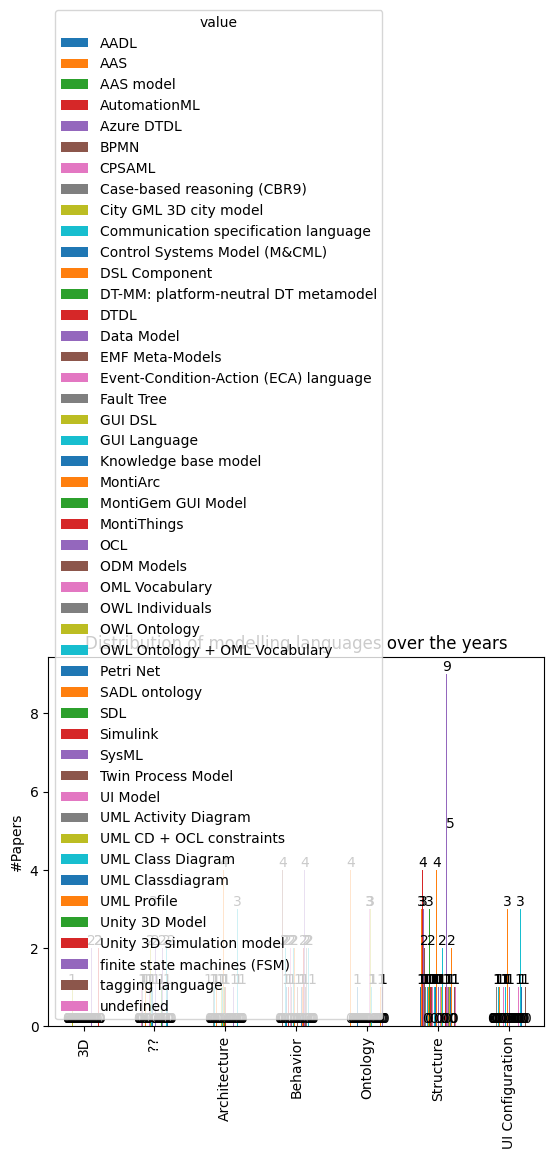

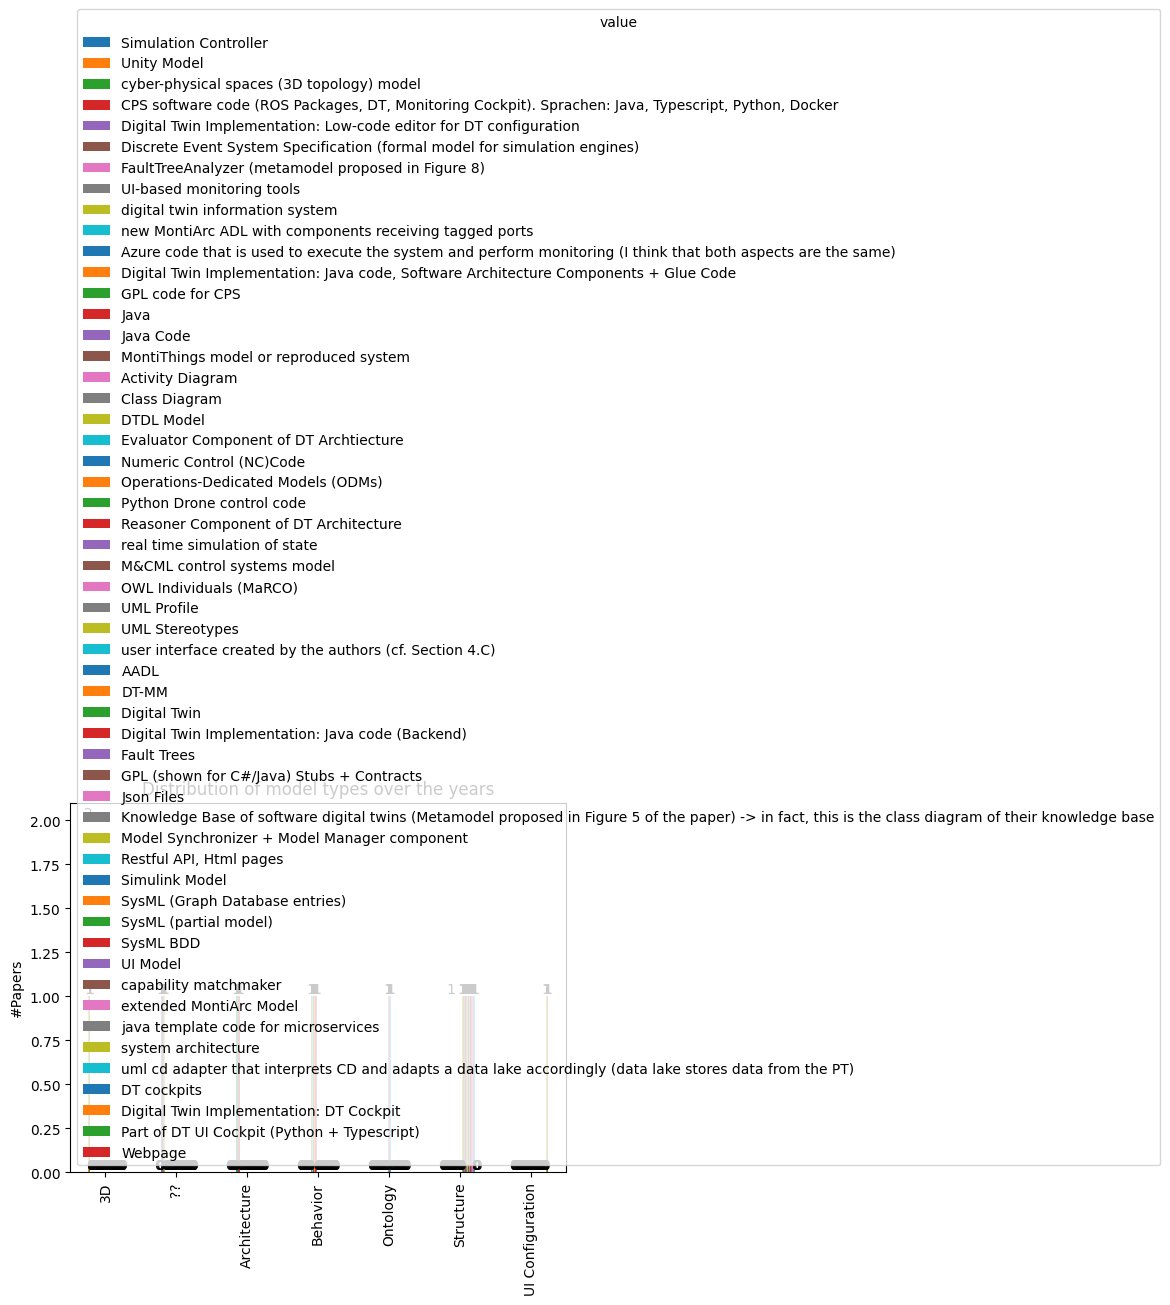

In [262]:
source_type = pd.DataFrame(columns = ['value', 'model type'])
target_type = pd.DataFrame(columns = ['value', 'model type'])
lang_type = pd.DataFrame(columns = ['value', 'model type'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:

        

        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            modeltype1 = mdeContents['model type']

            for item in lang:
                new_line = pd.DataFrame([{"value": item, 'model type': modeltype1}])
                lang_type = pd.concat([lang_type, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": mdeContents['source'], 'model type': modeltype1}])
            source_type = pd.concat([source_type, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['target'], 'model type': modeltype1}])
            target_type = pd.concat([target_type, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()


source_type = source_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = source_type.groupby(['model type','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="")
plt.title('Distribution of MDE techniques over the years')
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)

fig, axes = plt.subplots()
lang_type = lang_type.groupby(['model type','value'])
lang_type = lang_type#.filter(lambda x : len(x) > 1).groupby(['value','Publication Year'])
ax = lang_type.size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                         ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
plt.title('Distribution of modelling languages over the years')
for container in ax.containers:
    ax.bar_label(container)

fig, axes = plt.subplots()
target_type = target_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = target_type.groupby(['model type','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of model types over the years", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of model types over the years')


plt.savefig(destination_folder+"where_detailed3.jpg")